In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Train : Validation : Test = 6 : 2 : 2

In [2]:
data=pd.read_csv('Preprocessed_Data.csv')
target=pd.read_csv('target.csv')
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=2022)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=2022)

히든 레이어 4층, 층마다 노드 100개씩  
activation function : 히든 레이어에선 relu, 아웃풋 레이어에선 sigmoid (이진분류)  
loss function : binary cross entropy  
optimizer : nadam

In [3]:
model = Sequential(name='DNN')
model.add(Dense(100, input_dim = 36, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid', name='output'))

model.compile(loss='binary_crossentropy', optimizer='nadam', metrics='accuracy')

model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 34,101
Trainable params: 34,101
Non-trainable params: 0
_________________________________________________________________


In [4]:
fit_model = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
317/317 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.9032 - val_loss: 0.3442 - val_accuracy: 0.9079
Epoch 2/20
317/317 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.9061 - val_loss: 0.3117 - val_accuracy: 0.9079
Epoch 3/20
317/317 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.9061 - val_loss: 0.3125 - val_accuracy: 0.9079
Epoch 4/20
317/317 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9061 - val_loss: 0.3170 - val_accuracy: 0.9079
Epoch 5/20
317/317 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9061 - val_loss: 0.3083 - val_accuracy: 0.9079
Epoch 6/20
317/317 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.9061 - val_loss: 0.3087 - val_accuracy: 0.9079
Epoch 7/20
317/317 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.9061 - val_loss: 0.3097 - val_accuracy: 0.9079
Epoch 

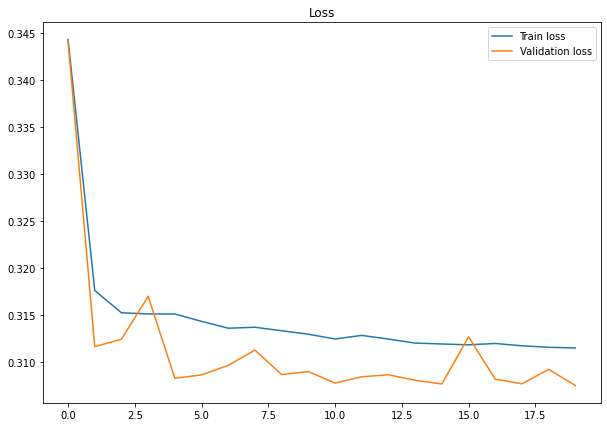

In [5]:
plt.figure(figsize=(10,7))
plt.plot(fit_model.history['loss'], label='Train loss')
plt.plot(fit_model.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

Test 데이터 예측, 성능 평가

In [6]:
for name, value in zip(model.metrics_names, model.evaluate(x_test, y_test)):
    print(name,':', value)

422/422 [==============================] - 0s 607us/step - loss: 0.2996 - accuracy: 0.9113
loss : 0.2995784282684326
accuracy : 0.9112873077392578


In [7]:
pred = model.predict(x_test)
bin_pred = tf.round(pred).numpy().flatten()

print(classification_report(y_test, bin_pred))

422/422 [==============================] - 0s 512us/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12296
           1       0.00      0.00      0.00      1197

    accuracy                           0.91     13493
   macro avg       0.46      0.50      0.48     13493
weighted avg       0.83      0.91      0.87     13493



In [8]:
confusion_matrix(y_test, bin_pred)

array([[12296,     0],
       [ 1197,     0]], dtype=int64)

0만 예측됨, 실제로 12296 : 1197 비율

In [9]:
unique, counts = np.unique(bin_pred, return_counts=True)
np.column_stack((unique, counts)) # 0만 예측함

array([[    0., 13493.]])

In [10]:
y_test.value_counts()

Loan Status
0              12296
1               1197
dtype: int64